# Linear Regression

- In this example, we make a linear regression model to predict the price of a house in boston based on a set of defined economic metrics.

In [46]:
# import plotting and ml libraries
from IPython.display import display, HTML
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

### Normalization

- Using the normalization of the output vector (Y), most models perform better.

### $$ f(y) = \frac{y - \mu_{y} }{\sigma_{y} }$$

In [55]:
boston = datasets.load_boston()
boston_panda = pd.read_csv('https://raw.githubusercontent.com/scikit-learn/scikit-learn/master/sklearn/datasets/data/boston_house_prices.csv', header=1)

# create train and test data
X = boston.data
Y = boston.target

scaler = MinMaxScaler()
Y = scaler.fit_transform(Y.reshape(-1, 1))

# create 7:3 train/test split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3)

### Data

- Lets get an understanding of the data before we proceed with training.

In [56]:
HTML(boston_panda.head(5).to_html())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


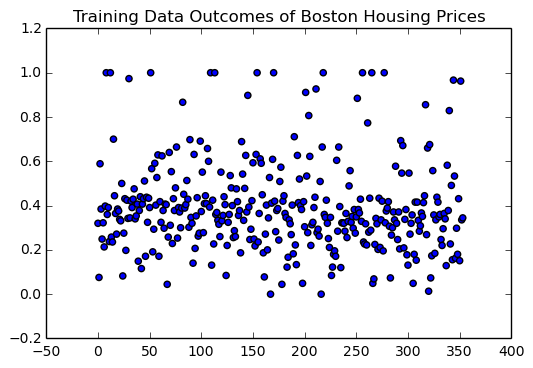

In [57]:
# plot sorted Y values
plt.scatter(range(0,len(train_y)),np.sort(train_y))
plt.title('Training Data Outcomes of Boston Housing Prices')
plt.show()

In [58]:
# create model and train
lr = LinearRegression()

lr.fit(train_x, train_y)
;

''

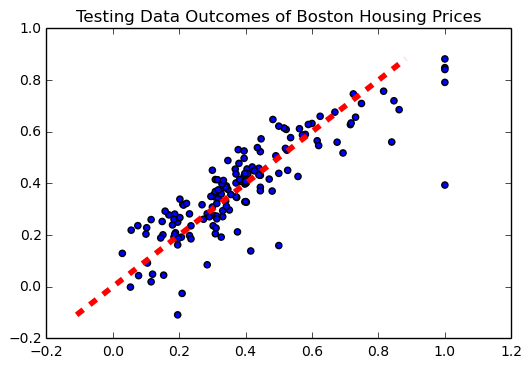

In [59]:
# plot predictions against ground truth
predictions = lr.predict(test_x)

plt.scatter(test_y,predictions)
plt.plot([predictions.min(),predictions.max()], [predictions.min(),predictions.max()], 'k--', lw=4, c='r')
plt.title('Testing Data Outcomes of Boston Housing Prices')
plt.show()

# Evaluation

- Using mean squared error, we can find the accuracy of the linear regression model

### $$ MSE =   \frac{1}{n} \sum_{i=1}^{n}( \hat{Y_{i}} - Y_{i})^2$$

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

print 'R Squared Value: ' + str(r2_score(predictions, test_y))
print 'Mean Squared Error: ' + str(mean_squared_error(predictions, test_y))

R Squared Value: 0.65577970042
Mean Squared Error: 0.0116057765299
